In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('yield_df.csv')

In [3]:
df

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.00,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.00,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.00,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.00,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.00,16.37
...,...,...,...,...,...,...,...,...
28237,28237,Zimbabwe,"Rice, paddy",2013,22581,657.0,2550.07,19.76
28238,28238,Zimbabwe,Sorghum,2013,3066,657.0,2550.07,19.76
28239,28239,Zimbabwe,Soybeans,2013,13142,657.0,2550.07,19.76
28240,28240,Zimbabwe,Sweet potatoes,2013,22222,657.0,2550.07,19.76


In [4]:
# Data Cleaning

In [5]:
# Check for missing values
print(df.isnull().sum())

Unnamed: 0                       0
Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64


In [8]:
# Check for duplicates
df.drop_duplicates()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.00,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.00,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.00,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.00,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.00,16.37
...,...,...,...,...,...,...,...,...
28237,28237,Zimbabwe,"Rice, paddy",2013,22581,657.0,2550.07,19.76
28238,28238,Zimbabwe,Sorghum,2013,3066,657.0,2550.07,19.76
28239,28239,Zimbabwe,Soybeans,2013,13142,657.0,2550.07,19.76
28240,28240,Zimbabwe,Sweet potatoes,2013,22222,657.0,2550.07,19.76


In [11]:
# Removing outliers 
for col in ["hg/ha_yield", "average_rain_fall_mm_per_year", "pesticides_tonnes", "avg_temp"]:
    clean = df[data[col] > 0]

print(clean)

       Unnamed: 0      Area            Item  Year  hg/ha_yield  \
0               0   Albania           Maize  1990        36613   
1               1   Albania        Potatoes  1990        66667   
2               2   Albania     Rice, paddy  1990        23333   
3               3   Albania         Sorghum  1990        12500   
4               4   Albania        Soybeans  1990         7000   
...           ...       ...             ...   ...          ...   
28237       28237  Zimbabwe     Rice, paddy  2013        22581   
28238       28238  Zimbabwe         Sorghum  2013         3066   
28239       28239  Zimbabwe        Soybeans  2013        13142   
28240       28240  Zimbabwe  Sweet potatoes  2013        22222   
28241       28241  Zimbabwe           Wheat  2013        22888   

       average_rain_fall_mm_per_year  pesticides_tonnes  avg_temp  
0                             1485.0             121.00     16.37  
1                             1485.0             121.00     16.37  
2  

In [12]:
# Forward/Backward Fill
df1=df.ffill(inplace=True)  # Forward fill
df2=df.bfill(inplace=True)  # Backward fill

In [13]:
# Winsorization
pesticides_upper_limit = df["pesticides_tonnes"].quantile(0.95)
pesticides_lower_limit = df["pesticides_tonnes"].quantile(0.05)
df["pesticides_tonnes"] = np.clip(data["pesticides_tonnes"], pesticides_lower_limit, pesticides_upper_limit)

In [14]:
from scipy.stats import zscore

In [15]:
df["yield_zscore"] = zscore(df["hg/ha_yield"])
df = df[(df["yield_zscore"] > -3) & (df["yield_zscore"] < 3)]

In [16]:
df

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,yield_zscore
0,0,Albania,Maize,1990,36613,1485.0,121.00,16.37,-0.476020
1,1,Albania,Potatoes,1990,66667,1485.0,121.00,16.37,-0.122257
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.00,16.37,-0.632338
3,3,Albania,Sorghum,1990,12500,1485.0,121.00,16.37,-0.759852
4,4,Albania,Soybeans,1990,7000,1485.0,121.00,16.37,-0.824592
...,...,...,...,...,...,...,...,...,...
28237,28237,Zimbabwe,"Rice, paddy",2013,22581,657.0,2550.07,19.76,-0.641190
28238,28238,Zimbabwe,Sorghum,2013,3066,657.0,2550.07,19.76,-0.870899
28239,28239,Zimbabwe,Soybeans,2013,13142,657.0,2550.07,19.76,-0.752295
28240,28240,Zimbabwe,Sweet potatoes,2013,22222,657.0,2550.07,19.76,-0.645415


In [24]:
df['Year'] = pd.to_datetime(df['Year']).dt.year

In [18]:
# Categorical: Use mode
df['Area'].fillna(df['Area'].mode()[0], inplace=True)

In [19]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding for 'Area' and 'Item'
le_area = LabelEncoder()
le_item = LabelEncoder()

df['Area_encoded'] = le_area.fit_transform(df['Area'])
df['Item_encoded'] = le_item.fit_transform(df['Item'])

# Drop the original columns if no longer needed
df.drop(['Area', 'Item'], axis=1, inplace=True)

df.head()

,Unnamed: 0,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,yield_zscore,Area_encoded,Item_encoded
0,0,1990-01-01,36613,1485.0,121.0,16.37,-0.476020,0,1
1,1,1990-01-01,66667,1485.0,121.0,16.37,-0.122257,0,3
2,2,1990-01-01,23333,1485.0,121.0,16.37,-0.632338,0,4
3,3,1990-01-01,12500,1485.0,121.0,16.37,-0.759852,0,5
4,4,1990-01-01,7000,1485.0,121.0,16.37,-0.824592,0,6


In [25]:
from sklearn.preprocessing import StandardScaler

# Selecting numerical columns for scaling
numerical_cols = ['Year', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp']

# Applying StandardScaler
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

print("After Standardization:\n", df.head())

After Standardization:
    Unnamed: 0      Year  hg/ha_yield  average_rain_fall_mm_per_year  \
0           0 -1.627486        36613                        0.46459   
1           1 -1.627486        66667                        0.46459   
2           2 -1.627486        23333                        0.46459   
3           3 -1.627486        12500                        0.46459   
4           4 -1.627486         7000                        0.46459   

   pesticides_tonnes  avg_temp  yield_zscore  Area_encoded  Item_encoded  
0          -0.874767 -0.684926     -0.476020             0             1  
1          -0.874767 -0.684926     -0.122257             0             3  
2          -0.874767 -0.684926     -0.632338             0             4  
3          -0.874767 -0.684926     -0.759852             0             5  
4          -0.874767 -0.684926     -0.824592             0             6  


In [26]:
from sklearn.preprocessing import MinMaxScaler

# Applying Min-Max Scaler
minmax_scaler = MinMaxScaler()
df[numerical_cols] = minmax_scaler.fit_transform(df[numerical_cols])

print("After Min-Max Scaling:\n", df.head())


After Min-Max Scaling:
    Unnamed: 0  Year  hg/ha_yield  average_rain_fall_mm_per_year  \
0           0   0.0        36613                       0.449671   
1           1   0.0        66667                       0.449671   
2           2   0.0        23333                       0.449671   
3           3   0.0        12500                       0.449671   
4           4   0.0         7000                       0.449671   

   pesticides_tonnes  avg_temp  yield_zscore  Area_encoded  Item_encoded  
0           0.000609  0.513458     -0.476020             0             1  
1           0.000609  0.513458     -0.122257             0             3  
2           0.000609  0.513458     -0.632338             0             4  
3           0.000609  0.513458     -0.759852             0             5  
4           0.000609  0.513458     -0.824592             0             6  


In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

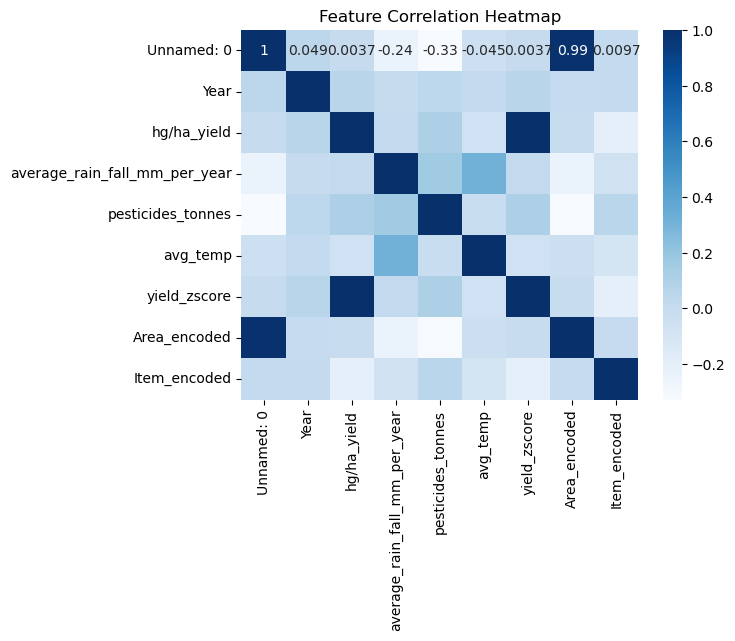

In [28]:
# Correlation heatmap
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='Blues')
plt.title("Feature Correlation Heatmap")
plt.show()

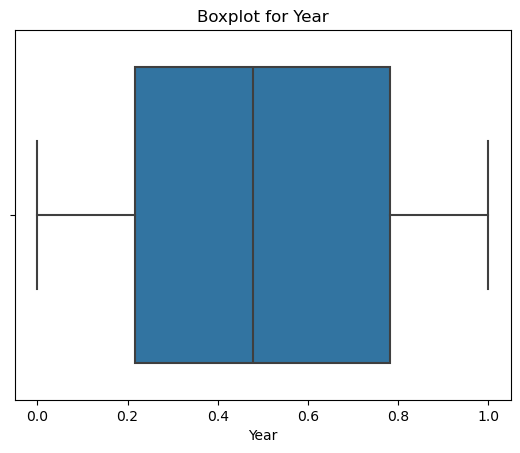

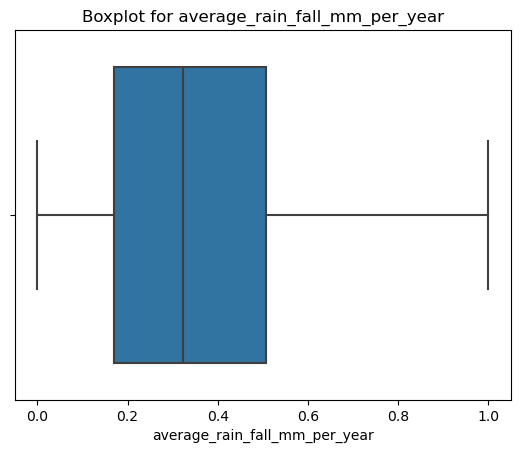

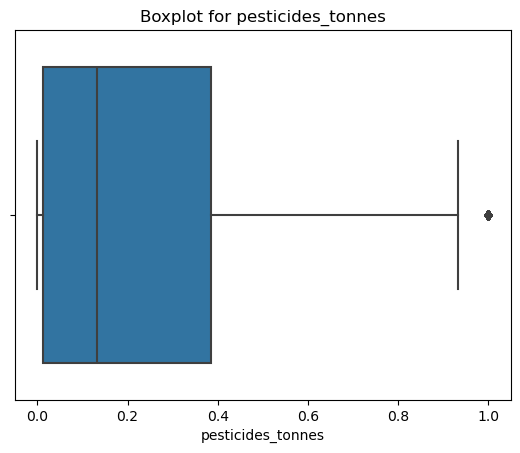

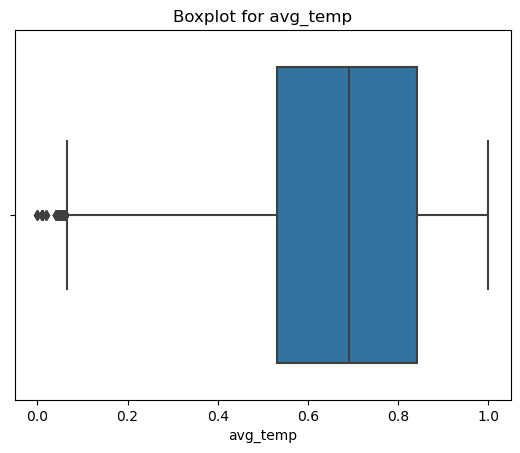

In [29]:
# Boxplot for numerical features
for col in numerical_cols:
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot for {col}")
    plt.show()

In [30]:
df.head()

,Unnamed: 0,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,yield_zscore,Area_encoded,Item_encoded
0,0,0.0,36613,0.449671,0.000609,0.513458,-0.476020,0,1
1,1,0.0,66667,0.449671,0.000609,0.513458,-0.122257,0,3
2,2,0.0,23333,0.449671,0.000609,0.513458,-0.632338,0,4
3,3,0.0,12500,0.449671,0.000609,0.513458,-0.759852,0,5
4,4,0.0,7000,0.449671,0.000609,0.513458,-0.824592,0,6


In [33]:
# Train-Test-Validate

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [35]:
X = df.drop(columns=['hg/ha_yield'])
y = df['hg/ha_yield']

In [36]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [37]:
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regressor": RandomForestRegressor(random_state=42),
    "Gradient Boosting Regressor": GradientBoostingRegressor(random_state=42),
    "Support Vector Regressor": SVR(kernel='rbf'),
    "Decision Tree Regressor": DecisionTreeRegressor(random_state=42),
    "K-Neighbors Regressor": KNeighborsRegressor()
}

# Train, predict, and evaluate each model
results = []
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the validation set
    y_pred = model.predict(X_val)
    
    # Calculate metrics
    mae = mean_absolute_error(y_val, y_pred)
    rmse = mean_squared_error(y_val, y_pred, squared=False)
    r2 = r2_score(y_val, y_pred)
    
    # Store results
    results.append({
        "Model": name,
        "MAE": mae,
        "RMSE": rmse,
        "R² Score": r2
    })

In [38]:
results_df = pd.DataFrame(results)
print(results_df)

                         Model           MAE          RMSE  R² Score
0            Linear Regression  1.659229e-09  1.907527e-09  1.000000
1      Random Forest Regressor  1.137675e+01  3.957242e+01  1.000000
2  Gradient Boosting Regressor  3.240459e+02  4.669552e+02  0.999958
3     Support Vector Regressor  5.052633e+04  7.920291e+04 -0.205105
4      Decision Tree Regressor  1.663423e+01  8.207218e+01  0.999999
5        K-Neighbors Regressor  3.845520e+04  5.707734e+04  0.374150


In [39]:
# Modeling & Evaluation

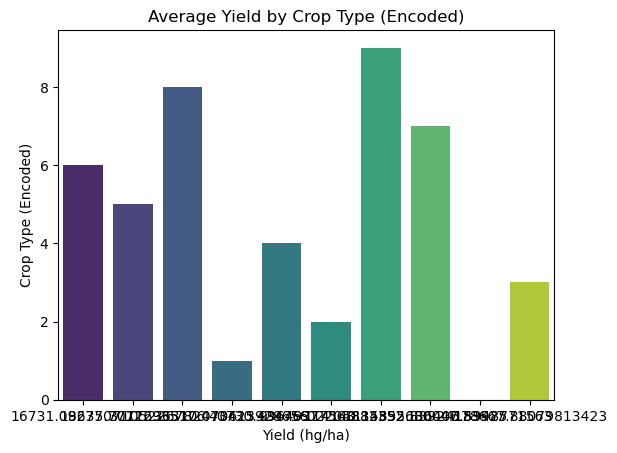

In [44]:
# Group data by 'Item_encoded' and calculate mean yield
avg_yield_per_crop = df.groupby('Item_encoded')['hg/ha_yield'].mean().reset_index()

# Bar plot for average yield by encoded crop type
sns.barplot(data=avg_yield_per_crop, x='hg/ha_yield', y='Item_encoded', palette='viridis')
plt.title("Average Yield by Crop Type (Encoded)")
plt.xlabel("Yield (hg/ha)")
plt.ylabel("Crop Type (Encoded)")
plt.show()

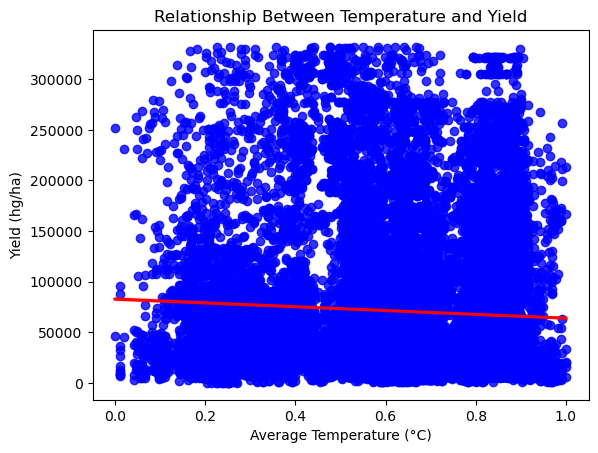

In [45]:
# Regression plot
sns.regplot(data=df, x='avg_temp', y='hg/ha_yield', scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title("Relationship Between Temperature and Yield")
plt.xlabel("Average Temperature (°C)")
plt.ylabel("Yield (hg/ha)")
plt.show()

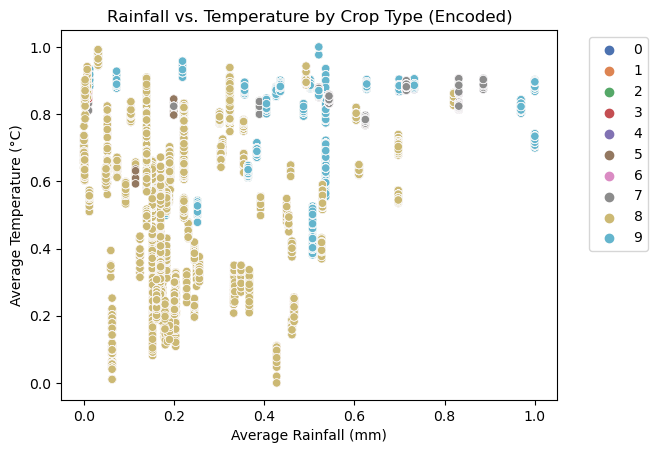

In [46]:
# Scatter plot for rainfall vs. temperature, hue by encoded crop type
sns.scatterplot(data=df, x='average_rain_fall_mm_per_year', y='avg_temp', hue='Item_encoded', palette='deep')
plt.title("Rainfall vs. Temperature by Crop Type (Encoded)")
plt.xlabel("Average Rainfall (mm)")
plt.ylabel("Average Temperature (°C)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

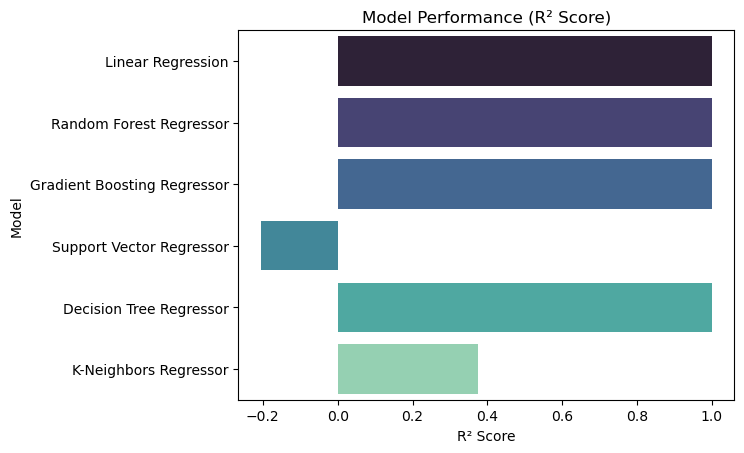

In [47]:
# Model Performance
sns.barplot(data=results_df, x='R² Score', y='Model', palette='mako')
plt.title("Model Performance (R² Score)")
plt.xlabel("R² Score")
plt.ylabel("Model")
plt.show()

In [ ]:
# Testing

In [48]:
test_results = []
predictions = {}

for name, model in models.items():
    y_test_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_test_pred)
    rmse = mean_squared_error(y_test, y_test_pred, squared=False)
    r2 = r2_score(y_test, y_test_pred)
    
    # Store the results
    test_results.append({
        "Model": name,
        "MAE": mae,
        "RMSE": rmse,
        "R² Score": r2
    })
    
    # Store predictions
    predictions[name] = y_test_pred

test_results_df = pd.DataFrame(test_results)
print("Test Results:")
print(test_results_df)

# Store actual vs predicted for each model
for name, preds in predictions.items():
    comparison_df = pd.DataFrame({
        "Actual": y_test,
        "Predicted": preds
    })
    print(f"\nActual vs Predicted for {name}:")
    print(comparison_df.head()) 

Test Results:
                         Model           MAE          RMSE  R² Score
0            Linear Regression  1.668608e-09  1.918212e-09  1.000000
1      Random Forest Regressor  1.101168e+01  3.850473e+01  1.000000
2  Gradient Boosting Regressor  3.320844e+02  4.786905e+02  0.999957
3     Support Vector Regressor  5.078405e+04  7.995484e+04 -0.211439
4      Decision Tree Regressor  1.574873e+01  6.443815e+01  0.999999
5        K-Neighbors Regressor  3.744067e+04  5.547150e+04  0.416888

Actual vs Predicted for Linear Regression:
       Actual  Predicted
28162   43678    43678.0
19420   41706    41706.0
8707   214976   214976.0
4790   130913   130913.0
10287   37417    37417.0

Actual vs Predicted for Random Forest Regressor:
       Actual  Predicted
28162   43678   43691.18
19420   41706   41710.73
8707   214976  214988.34
4790   130913  130893.84
10287   37417   37417.48

Actual vs Predicted for Gradient Boosting Regressor:
       Actual      Predicted
28162   43678   43045.1506

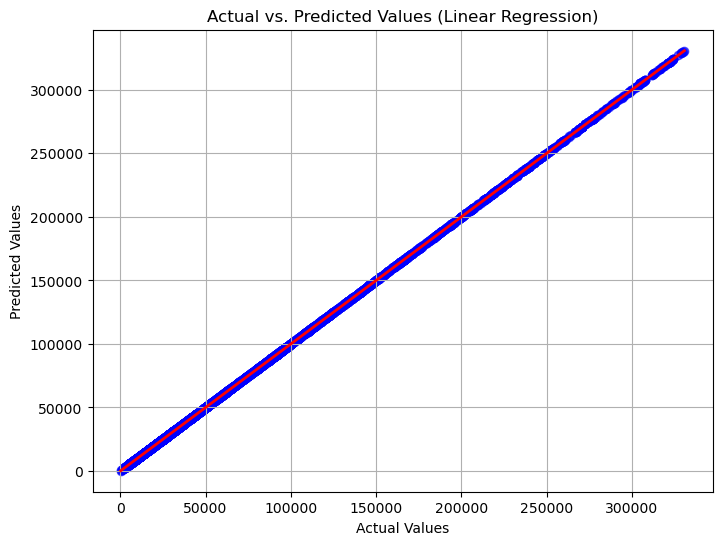

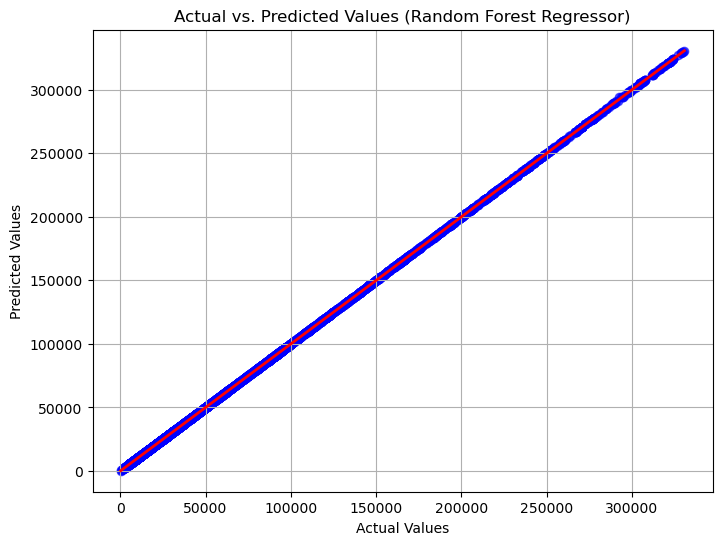

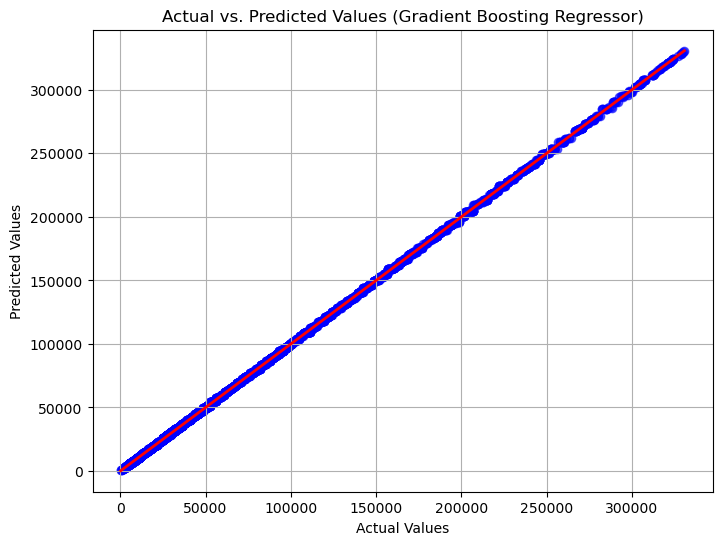

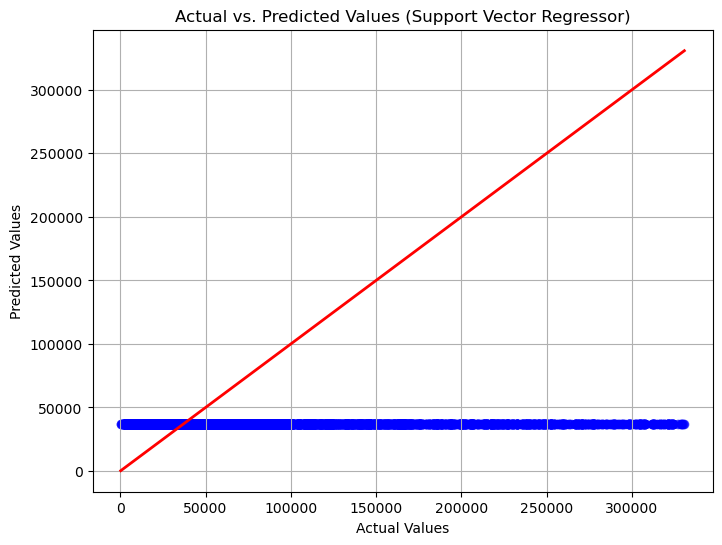

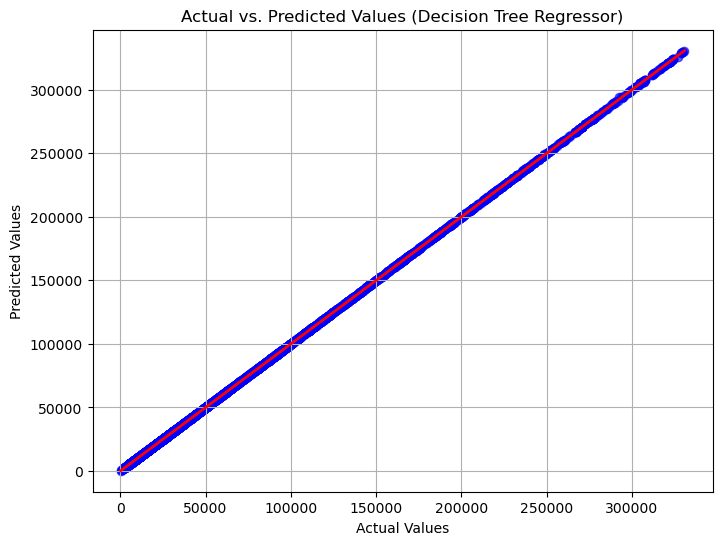

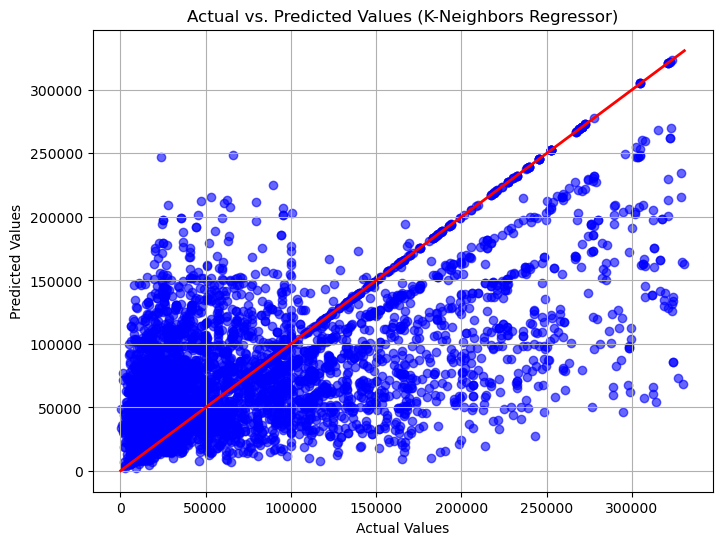

In [50]:
import matplotlib.pyplot as plt
import numpy as np

# Generate scatter plots for each model
for name, model in models.items():
    # Predict on the test set
    y_test_pred = model.predict(X_test)
    
    # Create scatter plot
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_test_pred, alpha=0.6, color='blue')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)  # Line y=x
    plt.title(f"Actual vs. Predicted Values ({name})")
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.grid(True)
    plt.show()

In [ ]:
# Confusion Matrix 

In [55]:
from sklearn.metrics import confusion_matrix

In [54]:
# Define bins for categorizing yield
bins = [0, 20000, 40000, 60000, 80000, 100000]
labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']

# Categorize actual and predicted yields
y_test_binned = pd.cut(y_test, bins=bins, labels=labels)
y_pred_binned = pd.cut(y_pred, bins=bins, labels=labels)

# Convert categories to strings
y_test_binned = y_test_binned.astype(str)
y_pred_binned = y_pred_binned.astype(str)

# Create the confusion matrix
cm = confusion_matrix(y_test_binned, y_pred_binned, labels=labels)

# Display confusion matrix
print("Confusion Matrix:\n", cm)


Confusion Matrix:
 [[152 343 242 214 182]
 [153 326 262 212 174]
 [ 56 147  82  84  51]
 [ 33  80  57  60  28]
 [ 51  91  78  74  56]]


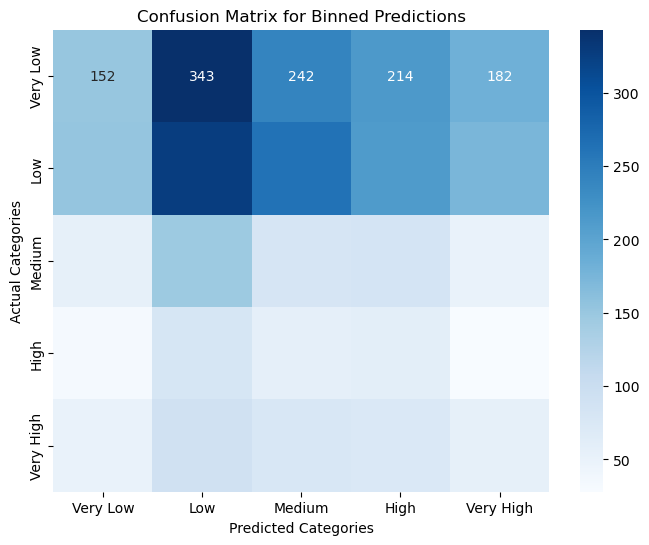

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert confusion matrix to a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix for Binned Predictions")
plt.xlabel("Predicted Categories")
plt.ylabel("Actual Categories")
plt.show()

In [ ]:
# Connecting to Snowflake

In [ ]:
import snowflake.connector 
import snowflake.connector.pandas_tools import write_pandas
df = pd.DataFrame(data)
conn = snowflake.connector.connect(
    user= 'shreesha',
    password = '23092@sP',
    account = 'ly90277',
    warehouse = 'COMPUTE_WH',
    database = 'YIELD_DB',
    schema = 'PUBLIC',
)

write_pandas(conn = conn, df = df, table_name = '', auto_create_table= True)
conn.close()